In [1]:
#Import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Use Calendar dataset
seattle_df = pd.read_csv('/Users/Sean.Kelly/Dropbox/My Mac (MACBOOK049)/Downloads/archive (1)/calendar.csv')
boston_df = pd.read_csv('/Users/Sean.Kelly/Dropbox/My Mac (MACBOOK049)/Downloads/archive/calendar.csv')

In [3]:
#Start by working with the seattle data


In [4]:
#Get a view of the data
seattle_df.head(15)
#Appears to be missing values for price


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [5]:
#A third of the price values are missing, this seems to be because there are nights where the accomodation is empty, thus is records this as null

seattle_df.isnull().sum()/len(seattle_df)



listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64

In [6]:
#As this null data is where the accomodation is not available, we can remove it
seattle_df = seattle_df.dropna()

In [7]:
seattle_df.dtypes 
#lets convert date to datetime and price to a numeric


listing_id     int64
date          object
available     object
price         object
dtype: object

In [8]:
def func(col):
     
    col = col.str[1:]
    col = pd.to_numeric(col,errors='coerce')
    return col
seattle_df['price'] = seattle_df[['price']].apply(func)

In [9]:
seattle_df['date'] = pd.to_datetime(seattle_df['date'],format='%Y-%m-%d')


In [10]:
#To see if there is a daily pattern in price, lets start by grouping together the price with the day
price_by_day = seattle_df[['date','price', 'listing_id']]
#price_by_day = pd.pivot_table(data = 'price_by_day',index = 'date', values = 'price')

In [11]:
price_by_day = pd.pivot_table(price_by_day, values='price', index=['date'],
                    columns=['listing_id'], aggfunc=np.sum)

In [12]:
price_by_day

listing_id,3335,4291,5682,6606,7369,9419,9460,9531,9534,9596,...,10299195,10309898,10310373,10318171,10319529,10331249,10332096,10334184,10339145,10340165
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,82.0,NaN,90.0,NaN,70.0,109.0,NaN,NaN,120.0,...,26.0,250.0,NaN,NaN,NaN,NaN,40.0,NaN,219.0,NaN
2016-01-05,NaN,82.0,NaN,90.0,NaN,70.0,109.0,NaN,NaN,120.0,...,26.0,250.0,NaN,50.0,NaN,NaN,40.0,NaN,219.0,NaN
2016-01-06,NaN,82.0,NaN,90.0,NaN,70.0,NaN,NaN,NaN,120.0,...,26.0,250.0,NaN,50.0,NaN,NaN,40.0,NaN,219.0,NaN
2016-01-07,NaN,82.0,NaN,90.0,NaN,70.0,NaN,NaN,NaN,120.0,...,26.0,250.0,NaN,50.0,NaN,NaN,40.0,NaN,219.0,NaN
2016-01-08,NaN,82.0,NaN,100.0,NaN,70.0,NaN,NaN,NaN,125.0,...,26.0,250.0,20.0,50.0,NaN,NaN,40.0,120.0,219.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-29,120.0,82.0,48.0,90.0,NaN,90.0,NaN,165.0,125.0,120.0,...,NaN,250.0,20.0,50.0,NaN,45.0,40.0,120.0,219.0,43.0
2016-12-30,120.0,82.0,50.0,100.0,NaN,100.0,NaN,165.0,125.0,125.0,...,NaN,250.0,20.0,50.0,NaN,45.0,40.0,120.0,219.0,43.0
2016-12-31,120.0,82.0,50.0,100.0,NaN,100.0,NaN,165.0,125.0,125.0,...,NaN,250.0,20.0,50.0,NaN,45.0,40.0,120.0,219.0,43.0


In [13]:
#Now, the price per day is split by listing, we can work out the mean price of an accomodation in seattle each day.
price_by_day['mean_price'] = price_by_day.mean(numeric_only=True, axis=1)

In [14]:
price_by_day

listing_id,3335,4291,5682,6606,7369,9419,9460,9531,9534,9596,...,10309898,10310373,10318171,10319529,10331249,10332096,10334184,10339145,10340165,mean_price
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,82.0,NaN,90.0,NaN,70.0,109.0,NaN,NaN,120.0,...,250.0,NaN,NaN,NaN,NaN,40.0,NaN,219.0,NaN,122.085879
2016-01-05,NaN,82.0,NaN,90.0,NaN,70.0,109.0,NaN,NaN,120.0,...,250.0,NaN,50.0,NaN,NaN,40.0,NaN,219.0,NaN,120.681307
2016-01-06,NaN,82.0,NaN,90.0,NaN,70.0,NaN,NaN,NaN,120.0,...,250.0,NaN,50.0,NaN,NaN,40.0,NaN,219.0,NaN,120.928258
2016-01-07,NaN,82.0,NaN,90.0,NaN,70.0,NaN,NaN,NaN,120.0,...,250.0,NaN,50.0,NaN,NaN,40.0,NaN,219.0,NaN,120.958896
2016-01-08,NaN,82.0,NaN,100.0,NaN,70.0,NaN,NaN,NaN,125.0,...,250.0,20.0,50.0,NaN,NaN,40.0,120.0,219.0,NaN,127.640853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-29,120.0,82.0,48.0,90.0,NaN,90.0,NaN,165.0,125.0,120.0,...,250.0,20.0,50.0,NaN,45.0,40.0,120.0,219.0,43.0,136.758025
2016-12-30,120.0,82.0,50.0,100.0,NaN,100.0,NaN,165.0,125.0,125.0,...,250.0,20.0,50.0,NaN,45.0,40.0,120.0,219.0,43.0,143.453169
2016-12-31,120.0,82.0,50.0,100.0,NaN,100.0,NaN,165.0,125.0,125.0,...,250.0,20.0,50.0,NaN,45.0,40.0,120.0,219.0,43.0,144.421476


In [15]:
price_by_day_avg = price_by_day['mean_price']
price_by_day_avg

date
2016-01-04    122.085879
2016-01-05    120.681307
2016-01-06    120.928258
2016-01-07    120.958896
2016-01-08    127.640853
                 ...    
2016-12-29    136.758025
2016-12-30    143.453169
2016-12-31    144.421476
2017-01-01    137.442505
2017-01-02    134.852305
Name: mean_price, Length: 365, dtype: float64

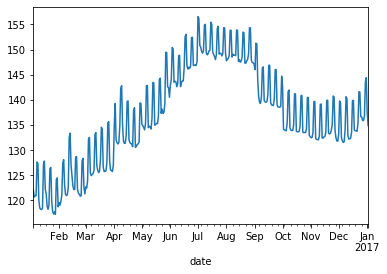

In [16]:
#it seems as if the summer months are highest in price. Lets sample it down to month for to get a clearer picture.
price_by_day_avg.plot()

In [17]:
#This clears it up that for seattle, june and july are the most expensive months to stay in accomodation. 
price_by_month_avg = price_by_day_avg.resample('M').mean()



In [18]:
#price_by_month_avg['month'] = ['Jan', 'Feb',  'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',  'Oct',  'Nov', 'Dec', 'Jan']
#price_by_month_avg = price_by_month_avg.insert(loc=1, column="month", value=['Jan', 'Feb',  'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',  'Oct',  'Nov', 'Dec', 'Jan'])
#price_by_month_avg

In [19]:
price_by_month_avg

date
2016-01-31    121.351933
2016-02-29    123.919651
2016-03-31    127.865517
2016-04-30    134.310698
2016-05-31    138.725895
2016-06-30    146.653896
2016-07-31    151.167083
2016-08-31    149.570310
2016-09-30    142.176463
2016-10-31    136.039802
2016-11-30    134.715648
2016-12-31    136.181063
2017-01-31    136.147405
Freq: M, Name: mean_price, dtype: float64

In [23]:
price_by_month_avg = price_by_month_avg.to_frame()

In [34]:
price_by_month_avg['Month'] = ['January', 'February',  'March', 'April', 'May', 'June', 'July', 'August', 'September',  'October',  'November', 'December', 'Jan']

In [35]:
price_by_month_avg

,mean_price,month,Month
date,,,
2016-01-31,121.351933,January,January
2016-02-29,123.919651,February,February
2016-03-31,127.865517,March,March
2016-04-30,134.310698,April,April
2016-05-31,138.725895,May,May
2016-06-30,146.653896,June,June
2016-07-31,151.167083,July,July
2016-08-31,149.570310,August,August
2016-09-30,142.176463,September,September


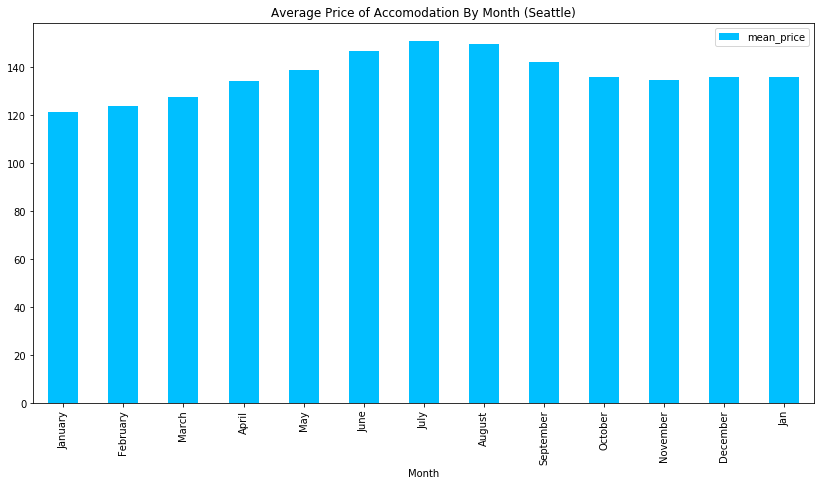

In [37]:
price_by_month_avg.plot(x = 'Month', y = 'mean_price',kind = 'bar', color = 'deepskyblue', figsize = (14,7), title = 'Average Price of Accomodation By Month (Seattle)')


In [ ]:
#Do the same for the boston dataset